In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

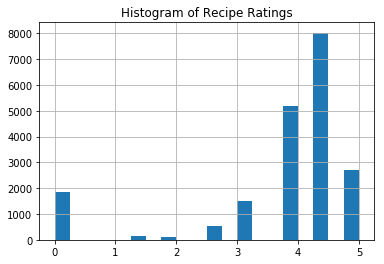

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

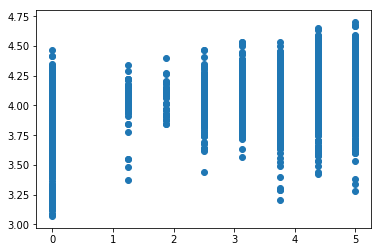

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

-0.003978314483867651

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

In [11]:
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
#pretty useless since we can't see what's going on -- too much data

plt.scatter(Y, svr.predict(X))

KeyboardInterrupt: 

In [13]:
svr.score(X, Y)

0.03856570651298896

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

KeyboardInterrupt: 

In [19]:
raw_data['ratingclass'] = np.where(raw_data['rating'] >= 4, 1, 0)
y_class = raw_data.ratingclass

from sklearn.svm import SVC
svc = SVC()

svc.fit(X,y_class)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
svc.score(X, y_class)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, y_class, cv=5)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# scale the input into mean 0 and standardized variance

scaled_X = StandardScaler().fit_transform(X)

pca = PCA(n_components=30)
newX = pca.fit_transform(scaled_X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.01105031 0.0090664  0.00730454 0.00538387 0.00484219 0.0044316
 0.00404303 0.00383273 0.00366463 0.00362646 0.00349403 0.0034265
 0.00339144 0.0033392  0.00329453 0.00313707 0.00309696 0.00307541
 0.0029913  0.00296307 0.00293225 0.00287856 0.00281313 0.00279329
 0.00272689 0.00271171 0.00269187 0.00268228 0.00264837 0.0026266 ]
[386.45243558 350.04689242 314.19928192 269.74670951 255.81711928
 244.73096556 233.75559716 227.59495455 222.54803528 221.38604924
 217.3061225  215.19597138 214.09233176 212.43699484 211.01112182
 205.90704313 204.58645047 203.87338236 201.06617316 200.11514165
 199.07144135 197.24052656 194.98621987 194.29718808 191.97407993
 191.43886117 190.73729567 190.39732907 189.18994373 188.41083086]


In [ ]:
cross_val_score(svc, newX, y_class, cv=5)

In [17]:
from sklearn.svm import SVC
svclinear = SVC(kernel='linear')

raw_data['ratingclass'] = np.where(raw_data['rating'] >= 4, 1, 0)
y_class = raw_data.ratingclass

cross_val_score(svclinear, newX, y_class, cv=5)

array([0.55871354, 0.570182  , 0.55696834, 0.56284289, 0.57146421])

In [20]:
nutrition = raw_data[['calories', 'protein', 'fat', 'sodium']]
nutrition.fillna(nutrition.mean(), inplace=True)

newDataX = np.concatenate([newX, nutrition], axis=1)
cross_val_score(svc, newDataX, y_class, cv=5)

array([0.61281476, 0.61605585, 0.61256545, 0.6201995 , 0.61785982])